In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Credit Approvals Data Set 

__Source:__ [https://archive.ics.uci.edu/ml/datasets/Credit+Approval]

All attribute names and values have been changed to meaningless symbols to protect the confidentiality of the data

In [2]:
#importing data
credit_raw = pd.read_csv('credit_approvals.csv', header=None)
credit_raw.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


## Cleaning Data

In [3]:
#turning 1 into int and removing ?
credit_raw[1] = credit_raw[1].map(lambda x: None if x is '?' else float(x))

In [4]:
#turning + into 1 and - into 0
credit_raw[15] = credit_raw[15].map(lambda x: 1 if x is '+' else 0)

In [5]:
#removing ? from data 
for col in credit_raw:
    credit_raw[col] = credit_raw[col].map(lambda x: None if x is '?' else x)
credit_raw.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,1


## Exploring Data

In [6]:
#creating subset of data with continuous data
credit_cont = credit_raw.loc[:, [1, 2, 7, 10, 14, 15]]
credit_cont.head()

,1,2,7,10,14,15
0,30.83,0.000,1.25,1,0,1
1,58.67,4.460,3.04,6,560,1
2,24.50,0.500,1.50,0,824,1
3,27.83,1.540,3.75,5,3,1
4,20.17,5.625,1.71,0,0,1


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


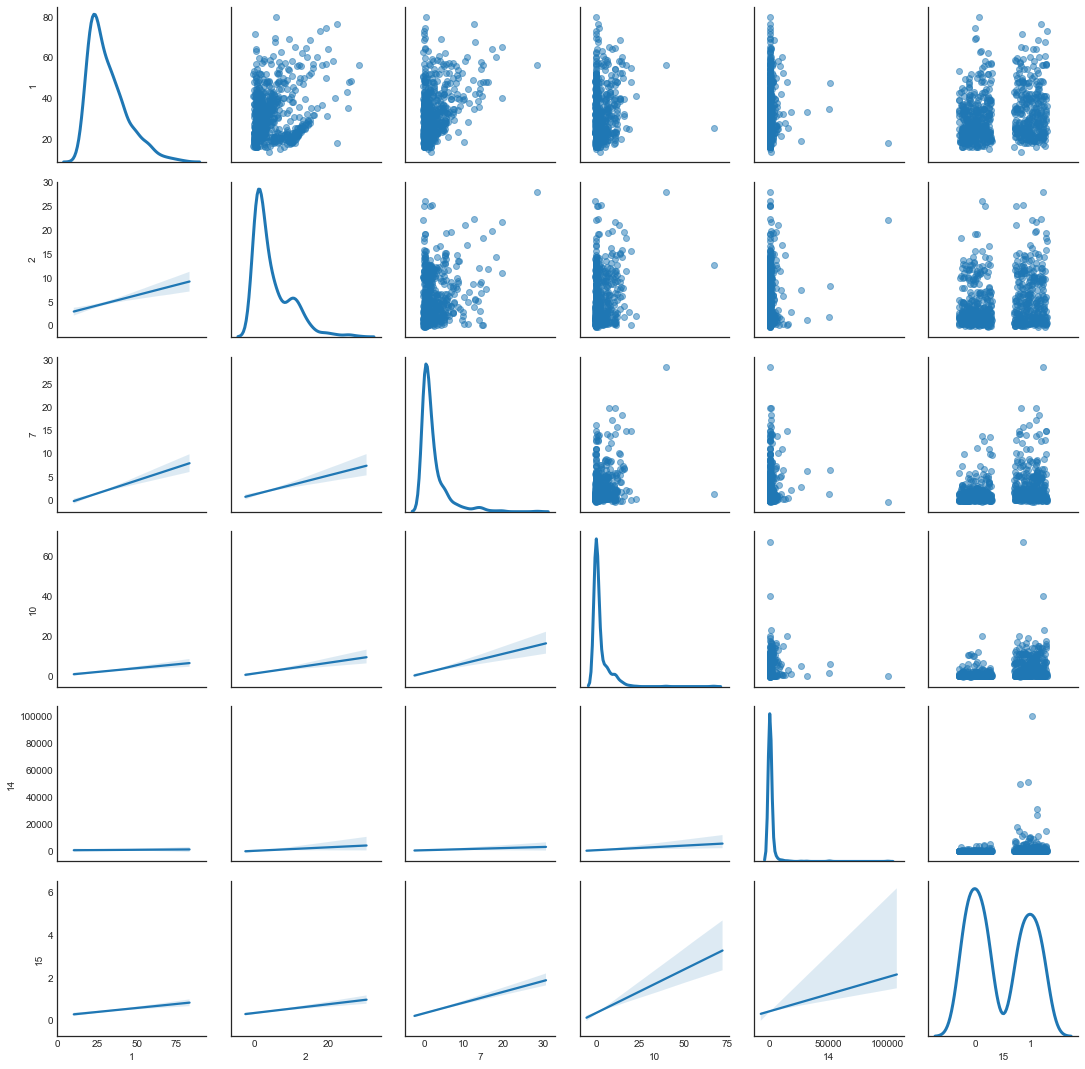

In [7]:
#scatterplot matrix
sns.set_style('white')

df_jittered = credit_cont.dropna()

jitter = pd.DataFrame(
    np.random.uniform(-0.3, 0.3, size=(df_jittered.shape)),
    columns=df_jittered.columns
)
df_jittered = df_jittered.add(jitter)

g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)
g.map_upper(plt.scatter, alpha=0.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot, lw=3)
plt.show()

Attribute 10 is skewed in terms of number of acceptances and rejections toward acceptances.

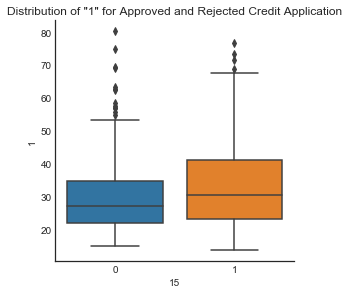

Att. 1 T-test: Ttest_indResult(statistic=68.30881350303038, pvalue=0.0)


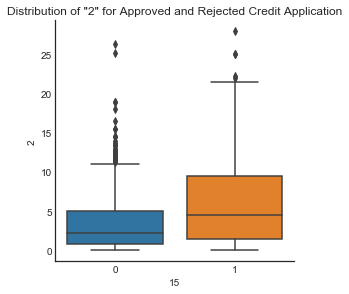

Att. 2 T-test: Ttest_indResult(statistic=22.649506214896903, pvalue=8.258650744072708e-97)


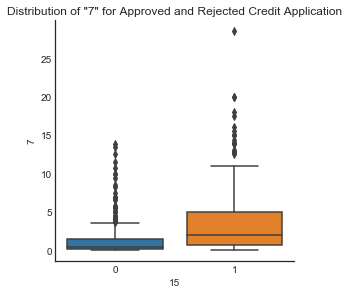

Att. 7 T-test: Ttest_indResult(statistic=13.808203659393687, pvalue=1.022666202998416e-40)


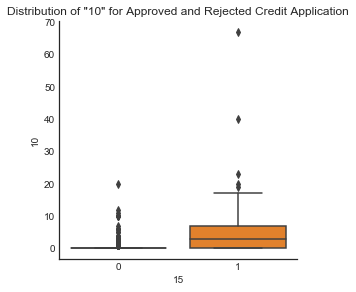

Att. 10 T-test: Ttest_indResult(statistic=10.50580271265132, pvalue=6.883898239954908e-25)


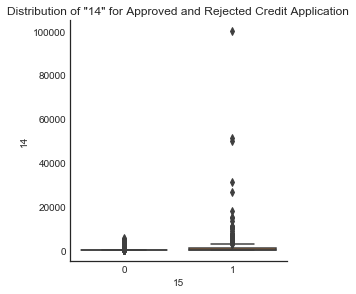

Att. 14 T-test: Ttest_indResult(statistic=5.127124288311523, pvalue=3.360869657866112e-07)


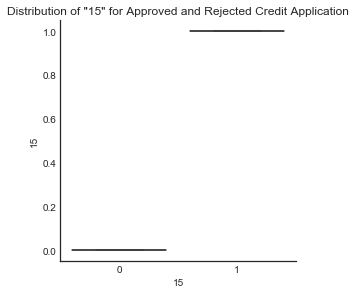

Att. 15 T-test: Ttest_indResult(statistic=0.0, pvalue=1.0)


In [8]:
#plotting distributions of continuous variables against approval or rejection
for col in credit_cont:
    g = sns.factorplot(x=15,
                      y=col, 
                      data=credit_cont, 
                      kind='box')
    plt.title('Distribution of "{}" for Approved and Rejected Credit Application'.format(col))
    plt.show()
    print('Att. {} T-test: {}'.format(col, stats.ttest_ind(credit_cont[col].dropna(), credit_cont[15].dropna())))

Attribute 1 p-value is 0.0.

Attribute 2, 7, 10, and 14 all have significant differences. 

Attribute 10 and 14 have significant outliers.

__Potential Features: 2, 7__

In [9]:
#creating sub set of data with categorical data
credit_cat = credit_raw.loc[:,[0, 3, 4, 5, 6, 8, 9, 11, 12, 15]]
credit_cat.head()

,0,3,4,5,6,8,9,11,12,15
0,b,u,g,w,v,t,t,f,g,1
1,a,u,g,q,h,t,t,f,g,1
2,a,u,g,q,h,t,f,f,g,1
3,b,u,g,w,v,t,t,t,g,1
4,b,u,g,w,v,t,f,f,s,1


In [10]:
#identifying most frequent values for attribute 5
credit_cat[5].value_counts()

c     137
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
m      38
x      38
d      30
e      25
j      10
r       3
Name: 5, dtype: int64

In [11]:
#identifying most frequent values for attribute 6
credit_cat[6].value_counts()

v     399
h     138
bb     59
ff     57
j       8
z       8
dd      6
n       4
o       2
Name: 6, dtype: int64

In [12]:
#paring down attributes '5' and '6' to top 3-4 values
credit_cat_abbrev = credit_cat.loc[
    ((credit_cat[5] == 'c') | (credit_cat[5] == 'q')  
     | (credit_cat[5] == 'w')  | (credit_cat[5] == 'i')) 
    & ((credit_cat[6] == 'v') | (credit_cat[6] == 'h') 
       | (credit_cat[6] == 'bb'))]

15    0    1
0           
a    49   54
b   123  102
Power_divergenceResult(statistic=48.21951219512195, pvalue=1.912314216030048e-10)
15    0    1
3           
u   132  135
y    44   23
Power_divergenceResult(statistic=122.45508982035929, pvalue=2.2837454433186577e-26)
15    0    1
4           
g   132  135
p    44   23
Power_divergenceResult(statistic=122.45508982035929, pvalue=2.2837454433186577e-26)
15   0   1
5         
c   74  61
i   44  14
q   27  50
w   31  33
Power_divergenceResult(statistic=63.796407185628745, pvalue=2.6236123693109604e-11)
15    0   1
6          
bb   28  19
h    28  45
v   120  94
Power_divergenceResult(statistic=154.44311377245515, pvalue=1.51176382711477e-31)
15    0    1
8           
f   140    8
t    36  150
Power_divergenceResult(statistic=186.47904191616766, pvalue=3.516868235458795e-40)
15    0    1
9           
f   130   48
t    46  110
Power_divergenceResult(statistic=66.23952095808384, pvalue=2.7238516957298563e-14)
15   0   1
11        
f   91  84

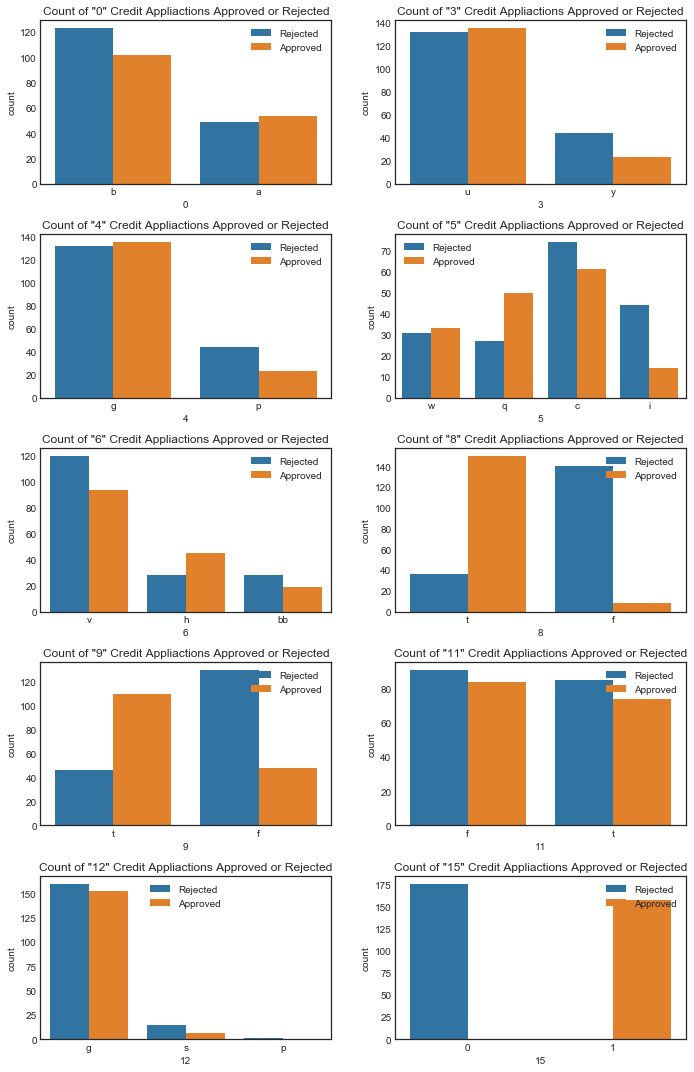

In [13]:
#plotting counts of categorical data versus approval or rejection
i = 1
plt.figure(figsize=(10,15))
for col in credit_cat_abbrev:
    plt.subplot(5, 2, i)
    g = sns.countplot(x=col, 
                hue=15, 
                data=credit_cat_abbrev)
    plt.legend(['Rejected', 'Approved'], loc='best')
    plt.title('Count of "{}" Credit Appliactions Approved or Rejected'.format(col))
    i +=1
    counttable = pd.crosstab(credit_cat_abbrev[col], credit_cat_abbrev[15])
    print(counttable)
    print(stats.chisquare(counttable, axis=None))
plt.tight_layout()
plt.show()

Attributes 0, 3, 4, 5, 6, 8, 9, and 12 all have significant differences. 

Attributes 0, 5, 8, 9, and 11 all have many data points for both acceptance and rejection for all values.

__Potential features: 0, 5, 8, 9__

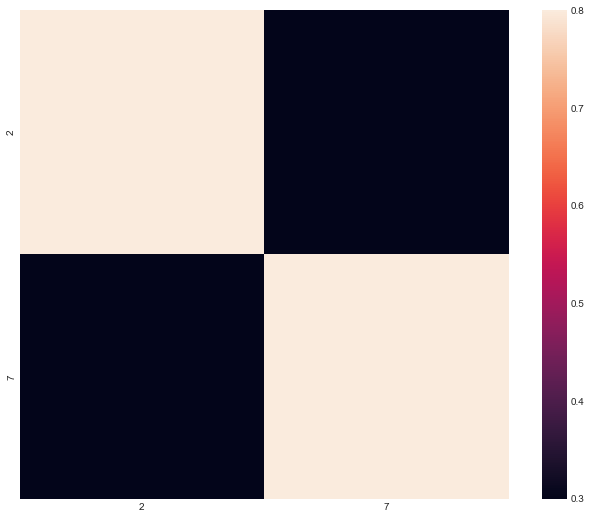

In [14]:
#identifying correlated variables through heatmap
credit_feat = credit_raw.loc[:, [2,7]]
corrmat = credit_feat.corr()

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, vmax=0.8, square=True)
plt.show()

Attributes 2 and 7 are not correlated to each other.

   __dummy__  __dummy__
0                      
a        103          0
b          0        225
Power_divergenceResult(statistic=418.7560975609756, pvalue=1.9152383656894011e-90)
   __dummy__  __dummy__
5                      
c         32        101
i         15         42
q         46         29
w         10         53
Power_divergenceResult(statistic=137.3658536585366, pvalue=1.8104731602914214e-26)
   __dummy__  __dummy__
8                      
f         40        103
t         63        122
Power_divergenceResult(statistic=50.80487804878049, pvalue=5.3834759301481526e-11)
   __dummy__  __dummy__
9                      
f         43        131
t         60         94
Power_divergenceResult(statistic=55.487804878048784, pvalue=5.40306962099907e-12)


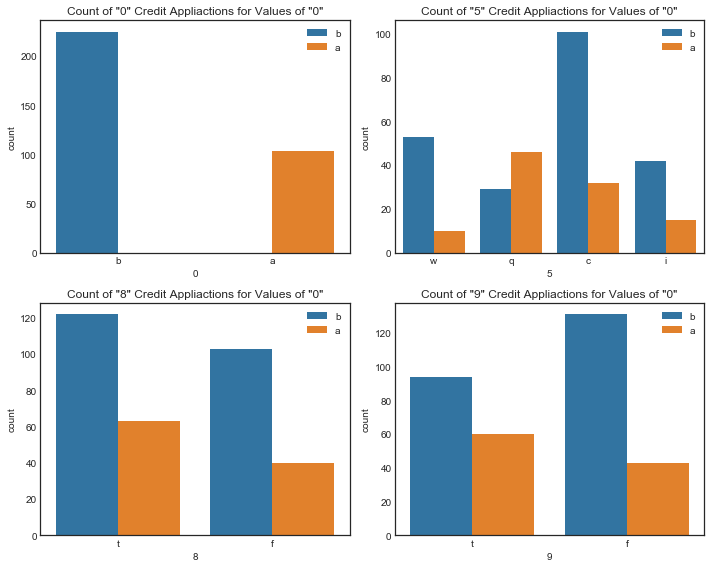

In [15]:
#plotting counts of categorical data versus attribute '0'
credit_feat = credit_cat_abbrev.loc[:, [0,5,8,9]]
i = 1
plt.figure(figsize=(10,8))
for col in credit_feat:
    plt.subplot(2, 2, i)
    g = sns.countplot(x=col, 
                hue=0, 
                data=credit_feat)
    plt.legend(loc='best')
    plt.title('Count of "{}" Credit Appliactions for Values of "0"'.format(col))
    i +=1
    counttable = pd.crosstab(credit_feat[col], credit_feat[0])
    print(counttable)
    print(stats.chisquare(counttable, axis=None))
plt.tight_layout()
plt.show()

No significant correlation exists between features and 0.

5    c   i   q   w
0                 
a   32  15  46  10
b  101  42  29  53
Power_divergenceResult(statistic=137.3658536585366, pvalue=1.8104731602914214e-26)
5    c   i   q   w
5                 
c  135   0   0   0
i    0  58   0   0
q    0   0  77   0
w    0   0   0  64
Power_divergenceResult(statistic=1180.443113772455, pvalue=2.5959776438916633e-242)
5   c   i   q   w
8                
f  63  38  19  28
t  72  20  58  36
Power_divergenceResult(statistic=68.44311377245509, pvalue=3.047009849761125e-12)
5   c   i   q   w
9                
f  74  45  27  32
t  61  13  50  32
Power_divergenceResult(statistic=65.23353293413173, pvalue=1.3497673778886239e-11)


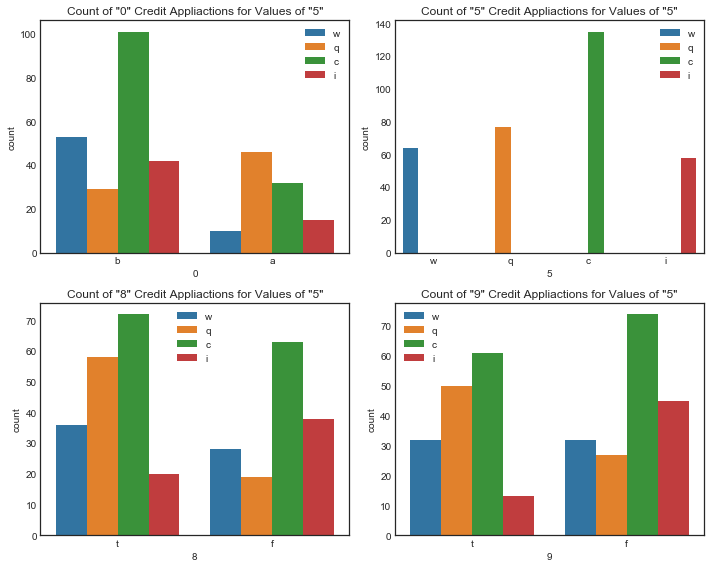

In [16]:
#plotting counts of categorical data versus attribute '5'
i = 1
plt.figure(figsize=(10,8))
for col in credit_feat:
    plt.subplot(2, 2, i)
    g = sns.countplot(x=col, 
                hue=5, 
                data=credit_feat)
    plt.legend(loc='best')
    plt.title('Count of "{}" Credit Appliactions for Values of "5"'.format(col))
    i +=1
    counttable = pd.crosstab(credit_feat[col], credit_feat[5])
    print(counttable)
    print(stats.chisquare(counttable, axis=None))
plt.tight_layout()
plt.show()

No significant correlation exists between features and 5.

8    f    t
0          
a   40   63
b  103  122
Power_divergenceResult(statistic=50.80487804878049, pvalue=5.3834759301481526e-11)
8   f   t
5        
c  63  72
i  38  20
q  19  58
w  28  36
Power_divergenceResult(statistic=68.44311377245509, pvalue=3.047009849761125e-12)
8    f    t
8          
f  148    0
t    0  186
Power_divergenceResult(statistic=342.6467065868263, pvalue=5.832279838560735e-74)
8    f    t
9          
f  115   63
t   33  123
Power_divergenceResult(statistic=66.1437125748503, pvalue=2.8555039736670465e-14)


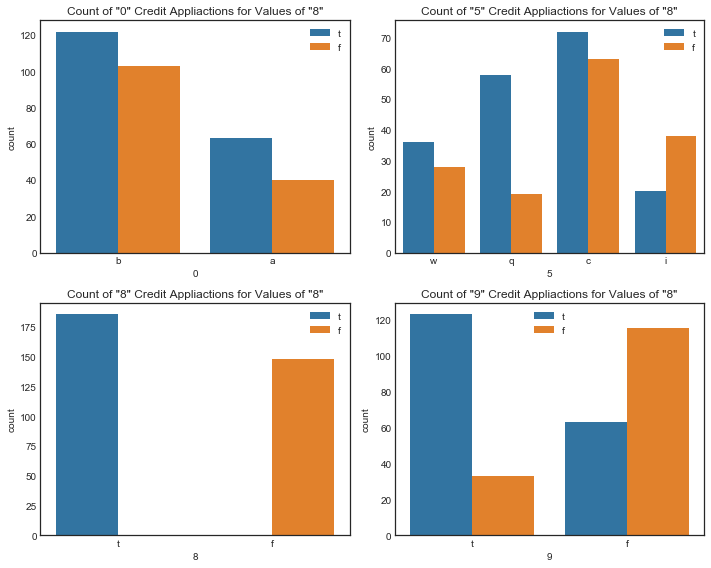

In [17]:
#plotting counts of categorical data versus attribute '8'
credit_feat = credit_cat_abbrev.loc[:, [0,5,8,9]]
i = 1
plt.figure(figsize=(10,8))
for col in credit_feat:
    plt.subplot(2, 2, i)
    g = sns.countplot(x=col, 
                hue=8, 
                data=credit_feat)
    plt.legend(loc='best')
    plt.title('Count of "{}" Credit Appliactions for Values of "8"'.format(col))
    i +=1
    counttable = pd.crosstab(credit_feat[col], credit_feat[8])
    print(counttable)
    print(stats.chisquare(counttable, axis=None))
plt.tight_layout()
plt.show()

No significant correlation exists between features and 8.

In [18]:
credit_feat = credit_cat_abbrev.loc[:, [0, 5, 8, 9]]
credit_feat.head()

,0,5,8,9
0,b,w,t,t
1,a,q,t,t
2,a,q,t,f
3,b,w,t,t
4,b,w,t,f


In [19]:
#paring down attributes '5' and '6' to top 3-4 values
credit_raw_abbrev = credit_raw.loc[
    ((credit_raw[5] == 'c') | (credit_raw[5] == 'q')  
     | (credit_raw[5] == 'w')  | (credit_raw[5] == 'i')) 
    & ((credit_raw[6] == 'v') | (credit_raw[6] == 'h') 
       | (credit_raw[6] == 'bb'))]
credit_raw_abbrev.dropna()
credit_raw_abbrev.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,1


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:2916: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / float(len(a))


Att. 0 and 2 - ANOVA: F_onewayResult(statistic=nan, pvalue=nan)
Att. 5 and 2 - ANOVA: F_onewayResult(statistic=0.6194289531514443, pvalue=0.6028515887309247)
Att. 8 and 2 - t vs f T-test: Ttest_indResult(statistic=4.503216907850336, pvalue=9.279554663996989e-06)
Att. 9 and 2 - t vs f T-test: Ttest_indResult(statistic=2.6204425723234106, pvalue=0.009185182697790475)


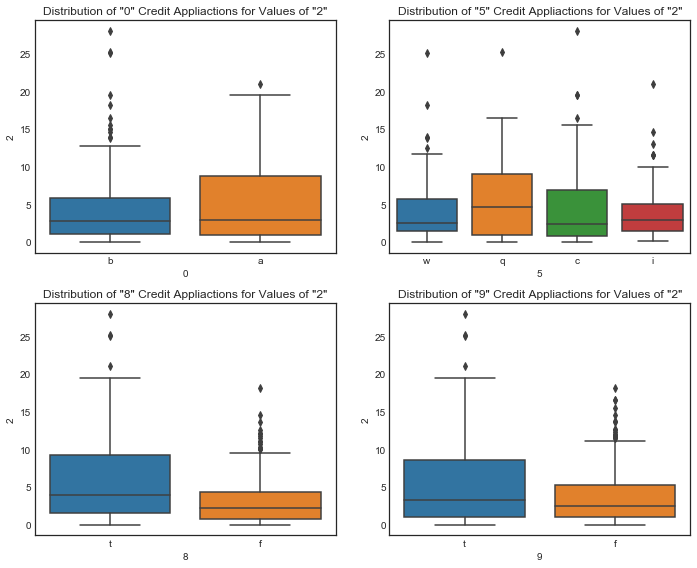

In [20]:
#plotting counts of categorical data versus attribute '2'
credit_feat = credit_raw_abbrev.loc[:, [0, 5, 8, 9]]
j = 1
plt.figure(figsize=(10,8))
for col in credit_feat:
    plt.subplot(2, 2, j)
    g = sns.boxplot(y=credit_cont[2], 
                x=credit_feat[col], 
               )
    plt.title('Distribution of "{}" Credit Appliactions for Values of "2"'.format(col))
    j += 1 
    unq = credit_feat[col].unique()
    #printing t-test values for all combinations of values
    if len(unq) == 2:
        print('Att. {} and 2 - {} vs {} T-test: {}'.format(col, unq[0], unq[(1)], 
                            stats.ttest_ind(credit_raw_abbrev[2].loc[credit_raw_abbrev[col] == unq[0]], 
                            credit_raw_abbrev[2].loc[credit_raw_abbrev[col] == unq[(1)]])))
    elif len(unq) == 3:
        print('Att. {} and 2 - ANOVA: {}'.format(col, 
                            stats.f_oneway(credit_raw_abbrev[2].loc[credit_raw_abbrev[col] == unq[0]], 
                            credit_raw_abbrev[2].loc[credit_raw_abbrev[col] == unq[1]],
                            credit_raw_abbrev[2].loc[credit_raw_abbrev[col] == unq[2]])))
    else:
        print('Att. {} and 2 - ANOVA: {}'.format(col, 
                            stats.f_oneway(credit_raw_abbrev[2].loc[credit_raw_abbrev[col] == unq[0]], 
                            credit_raw_abbrev[2].loc[credit_raw_abbrev[col] == unq[1]],
                            credit_raw_abbrev[2].loc[credit_raw_abbrev[col] == unq[2]],
                            credit_raw_abbrev[2].loc[credit_raw_abbrev[col] == unq[3]])))

            
plt.tight_layout()
plt.show()


Attribute 2 is not correlated with attribute 0 (values a and b), and attribute 5 (all values).

Attribute 2 is correlated with attributes 8 and 9.  True values for both variables are correlated with higher values of attribute 2.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:2916: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / float(len(a))


Att. 0 and 7 - ANOVA: F_onewayResult(statistic=nan, pvalue=nan)
Att. 5 and 7 - ANOVA: F_onewayResult(statistic=0.6372083137070361, pvalue=0.5915087969990394)
Att. 8 and 7 - t vs f T-test: Ttest_indResult(statistic=6.617875193064538, pvalue=1.463049975495466e-10)
Att. 9 and 7 - t vs f T-test: Ttest_indResult(statistic=3.3929999684140357, pvalue=0.0007749205298977854)


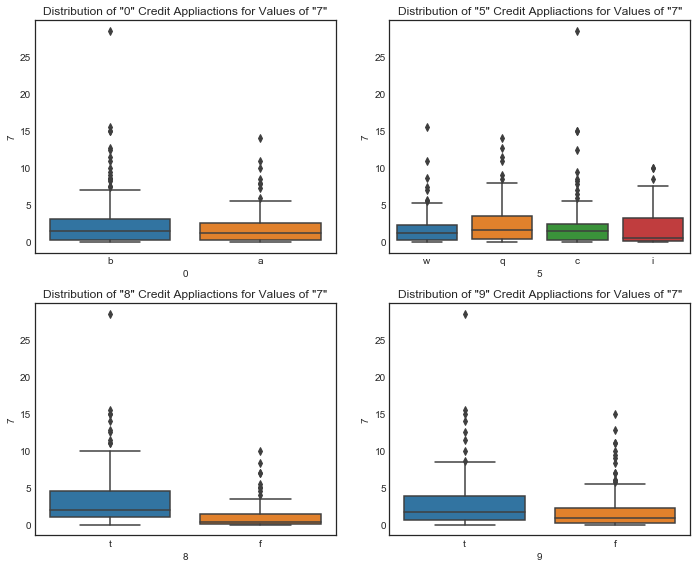

In [21]:
#plotting counts of categorical data versus attribute '7'
credit_feat = credit_raw_abbrev.loc[:, [0, 5, 8, 9]]
j = 1
plt.figure(figsize=(10,8))
for col in credit_feat:
    plt.subplot(2, 2, j)
    g = sns.boxplot(y=credit_cont[7].dropna(), 
                x=credit_feat[col].dropna(), 
               )
    plt.title('Distribution of "{}" Credit Appliactions for Values of "7"'.format(col))
    j += 1 
    unq = credit_feat[col].unique()
    #printing t-test values for all combinations of values
    if len(unq) == 2:
        print('Att. {} and 7 - {} vs {} T-test: {}'.format(col, unq[0], unq[(1)], 
                            stats.ttest_ind(credit_raw_abbrev[7].loc[credit_raw_abbrev[col] == unq[0]], 
                            credit_raw_abbrev[7].loc[credit_raw_abbrev[col] == unq[(1)]])))
    elif len(unq) == 3:
        print('Att. {} and 7 - ANOVA: {}'.format(col, 
                            stats.f_oneway(credit_raw_abbrev[7].loc[credit_raw_abbrev[col] == unq[0]], 
                            credit_raw_abbrev[7].loc[credit_raw_abbrev[col] == unq[1]],
                            credit_raw_abbrev[7].loc[credit_raw_abbrev[col] == unq[2]])))
    else:
        print('Att. {} and 7 - ANOVA: {}'.format(col, 
                            stats.f_oneway(credit_raw_abbrev[7].loc[credit_raw_abbrev[col] == unq[0]], 
                            credit_raw_abbrev[7].loc[credit_raw_abbrev[col] == unq[1]],
                            credit_raw_abbrev[7].loc[credit_raw_abbrev[col] == unq[2]],
                            credit_raw_abbrev[7].loc[credit_raw_abbrev[col] == unq[3]])))
                

plt.tight_layout()
plt.show()


Attribute 7 is not correlated with attribute 0 (values a and b), and attribute 5 (all values).

Attribute 7 is correlated with attributes 8 and 9.  True values for both variables are correlated with higher values of attribute 7.

Because attribute 8 is more highly correlated with the output attribute 15, attribute 9 will be dropped in lieu of attribute 8.

## Feature Engineering

In [22]:
#creating df for features
#turning categorical feature '5' into numbers
features = pd.get_dummies(credit_raw_abbrev[5])

In [23]:
#turning categorical feature '0' into numbers
features['0'] = np.where((credit_raw_abbrev[0]=='a'), 1, 0)

In [24]:
#turning categorical feature '8' into numbers
features['8'] = np.where((credit_raw_abbrev[8]=='t'), 1, 0)

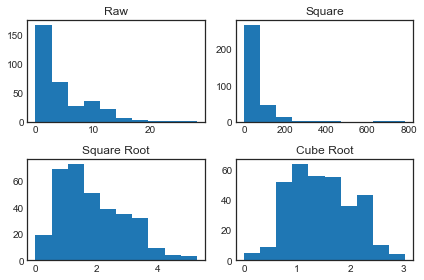

In [25]:
#plotting to transform to normality for '2'
fig = plt.figure()

fig.add_subplot(2, 2, 1)
plt.hist(credit_raw_abbrev[2].dropna())
plt.title('Raw')

fig.add_subplot(2, 2, 2)
plt.hist((credit_raw_abbrev[2].dropna())**2)
plt.title('Square')

fig.add_subplot(2, 2, 3)
plt.hist(np.sqrt(credit_raw_abbrev[2].dropna()))
plt.title('Square Root')

fig.add_subplot(2, 2, 4)
plt.hist((credit_raw_abbrev[2].dropna())**(1/3))
plt.title('Cube Root')

plt.tight_layout()
plt.show()

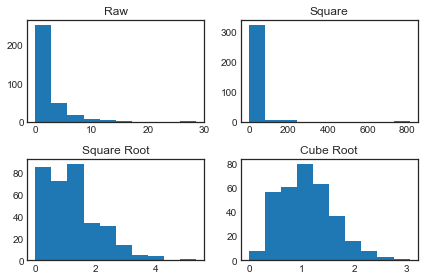

In [26]:
#plotting to transform to normality for '7'
fig = plt.figure()

fig.add_subplot(221)
plt.hist(credit_raw_abbrev[7].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist((credit_raw_abbrev[7].dropna())**2)
plt.title('Square')

fig.add_subplot(223)
plt.hist(np.sqrt(credit_raw_abbrev[7].dropna()))
plt.title('Square Root')

fig.add_subplot(224)
plt.hist((credit_raw_abbrev[7].dropna())**(1/3))
plt.title('Cube Root')

plt.tight_layout()
plt.show()

Cube root looks most normal.

In [27]:
#Adding in continuous features with normal distributions
features['cube_root_2'] = (credit_raw_abbrev[2].dropna())**(1/3)
features['cube_root_7'] = (credit_raw_abbrev[7].dropna())**(1/3)

features.head()

,c,i,q,w,0,8,cube_root_2,cube_root_7
0,0,0,0,1,0,1,0.000000,1.077217
1,0,0,1,0,1,1,1.646057,1.448631
2,0,0,1,0,1,1,0.793701,1.144714
3,0,0,0,1,0,1,1.154800,1.553616
4,0,0,0,1,0,1,1.778447,1.195819


## Feature Explanation
__Attribute 5:__ This attribute was selected because it had  a significant correlation to acceptance or rejection.  I decided to take the top 5 values to help predict outcomes because there were too many values possible.

__Attribute 0:__ This attribute was selected because it had  a significant correlation to acceptance or rejection and was not correlated to other attributes.

__Attribute 8:__ This attribute was selected because it had  a significant correlation to acceptance or rejection and was not correlated to other attributes.  Attribute 8 was chosen over attribute 9 (another t/f attribute) because attribute 8 was more highly correlated to acceptance and rejection than attribute 9.

__Attribute 2:__ This attribute was selected because it had  a significant correlation to acceptance or rejection and was not correlated to other attributes.  The cube root of 2 was taken because it made the attribute more normally distributed.

__Attribute 7:__ This attribute was selected because it had  a significant correlation to acceptance or rejection and was not correlated to other attributes.  The cube root of 27was taken because it made the attribute more normally distributed.